In [1]:
import scanpy as sc
import scvi
import plotnine as p

In [2]:
import numpy as np
from mizani.transforms import trans, trans_new

class neg_log10(trans):
    @staticmethod
    def transform(x):
        return -np.log10(x)

    @staticmethod
    def inverse(x):
        return 10**-x


class trans_log10(trans):
    @staticmethod
    def transform(x):
        return np.log10(x)

    @staticmethod
    def inverse(x):
        return 10**x


class neg_log10_breaks:
    def __init__(self, n=5):
        self.n = n

    def __call__(self, limits):
        _min = int(np.floor(np.log10(limits[1])))
        breaks = np.array(
            [[10.0**k, 5.0 * 10.0 ** (k - 1)] for k in range(0, _min, -1)]
        ).ravel()

        return breaks.tolist()

In [3]:
# 设置参数
import matplotlib as mpl

mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

In [4]:
ANNO_COL = "manual_celltype_annotation"
adata = sc.read("./anndata_manual_anno.h5ad")
adata

/home/fanxi/projects/work/sc-rna/sc-project-4-irea/sc_rna/rep2/.venv/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.


AnnData object with n_obs × n_vars = 100443 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'keep', 'RNA_snn_res.0.3', 'RNA_snn_res.0.6', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'seurat_clusters', 'pANN', 'DF.classifications', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'cell_type', 'ident', 'sample', 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'size_factors', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_2', 'leiden_00_25', 'leiden_00_5', 'manual_celltype_anno

In [5]:
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 100443 × 17269
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'keep', 'RNA_snn_res.0.3', 'RNA_snn_res.0.6', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'seurat_clusters', 'pANN', 'DF.classifications', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'cell_type', 'ident', 'sample', 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'size_factors', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_2', 'leiden_00_25', 'leiden_00_5', 'manual_celltype_ann

In [6]:
scvi.model.SCVI.setup_anndata(
    adata,
    size_factor_key="total_counts",
)

model = scvi.model.SCVI(adata, gene_likelihood="nb")

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/home/fanxi/projects/work/sc-rna/sc-project-4-irea/sc_rna/rep2/.venv/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.


In [7]:
1e6 / adata.shape[0]

9.955895383451312

In [8]:
model.train(early_stopping=True)

Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A2') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/fanxi/projects/work/sc-rna/sc-project-4-irea/sc_rna/rep2/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: PossibleUser

Epoch 3/80:   2%|▎         | 2/80 [07:42<5:00:23, 231.07s/it, v_num=1, train_loss_step=6.89e+3, train_loss_epoch=5.53e+3]

In [ ]:
model.save("./mode-SCVI-差异分析.pkl")

/tmp/ipykernel_1705967/1687038807.py:24: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


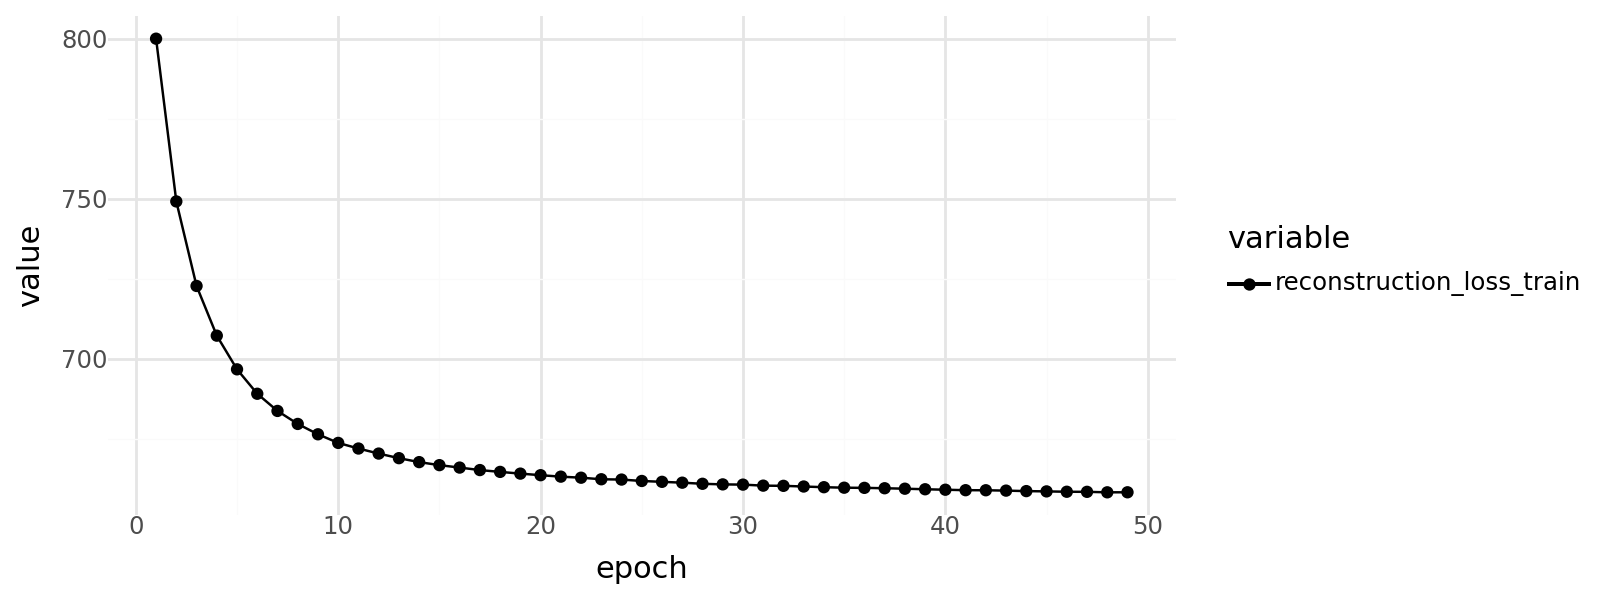

In [ ]:
history_df = (
    model.history["reconstruction_loss_train"]
    .astype(float)
    .reset_index()
    .melt(id_vars=["epoch"])
)

p.options.figure_size = 8, 3

p_ = (
    p.ggplot(
        p.aes(x="epoch", y="value", color="variable"), history_df.query("epoch > 0")
    )
    + p.geom_line()
    + p.geom_point()
    + p.scale_color_manual(
        {"reconstruction_loss_train": "black", "reconstruction_loss_validation": "red"}
    )
    + p.theme_minimal()
)

# p_.save('fig1.png', dpi = 300)

print(p_)

In [ ]:
"""
model.get_latent_representation(give_mean=False, return_dist=True)：这个方法从scvi模型中提取潜在表示。
give_mean=False：指示方法返回潜在变量的分布（而不是分布的均值）。
return_dist=True：指示方法返回完整的潜在分布，包括均值和方差。
qzm 和 qzv：分别表示潜在分布的均值和方差。
"""

qzm, qzv = model.get_latent_representation(give_mean=False, return_dist=True)
model.adata.obsm["X_latent_qzm"] = qzm
model.adata.obsm["X_latent_qzv"] = qzv

In [ ]:
# %pip install pymde

In [ ]:
model.adata.obsm["X_mde"] = scvi.model.utils.mde(model.adata.obsm["X_latent_qzm"])

Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


In [ ]:
for i, y in enumerate(adata.obsm["X_mde"].T):
    adata.obs[f"mde_{i + 1}"] = y

In [ ]:
model.adata

AnnData object with n_obs × n_vars = 100443 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'keep', 'RNA_snn_res.0.3', 'RNA_snn_res.0.6', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'seurat_clusters', 'pANN', 'DF.classifications', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'cell_type', 'ident', 'sample', 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'size_factors', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_2', 'leiden_00_25', 'leiden_00_5', 'manual_celltype_anno

/tmp/ipykernel_1705967/383194928.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


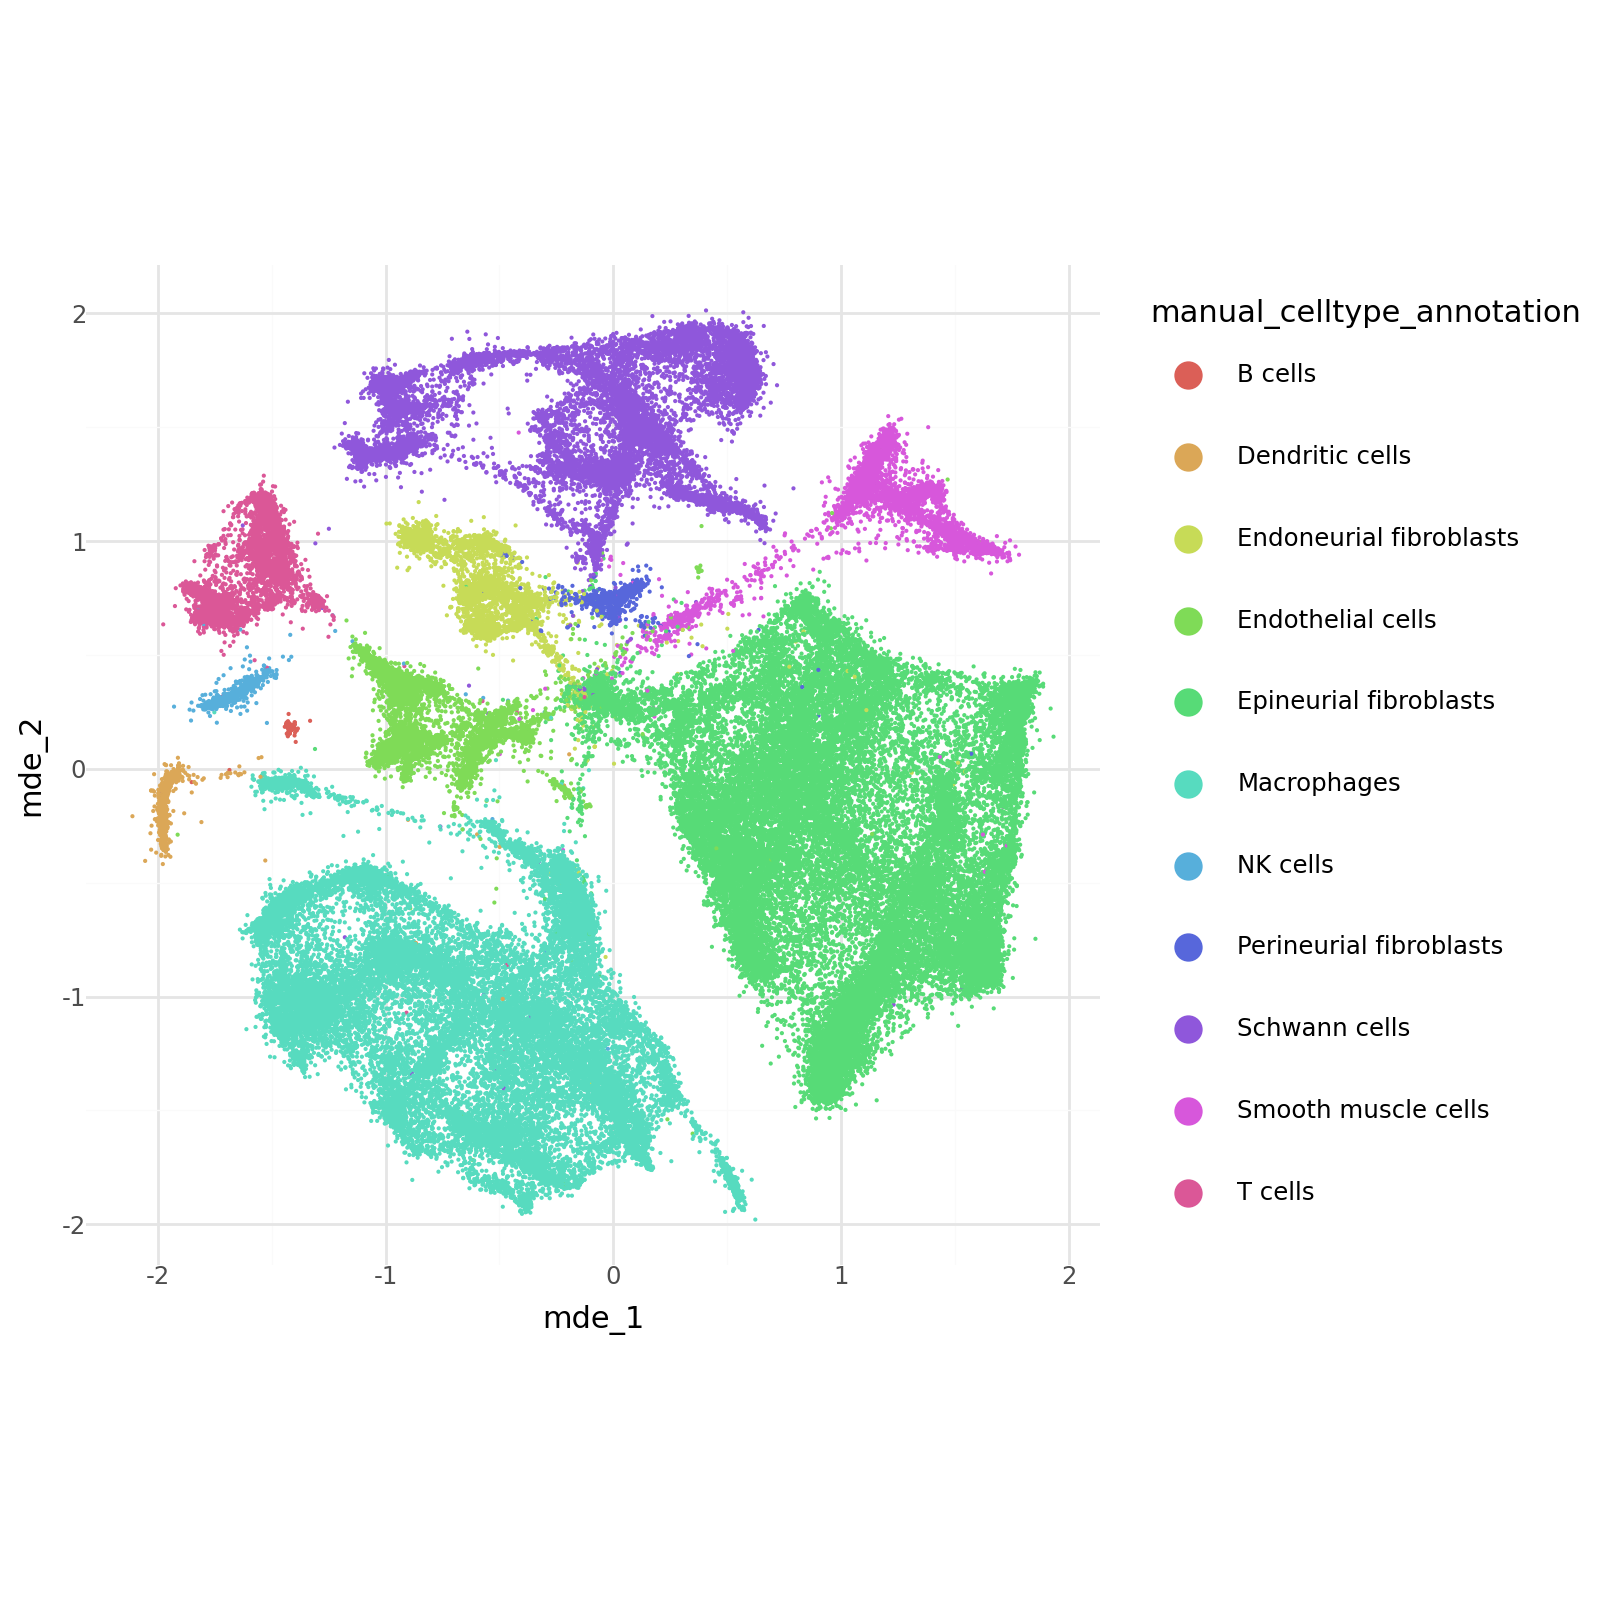

In [ ]:
p.options.figure_size = 8, 8

# tmp_ = model.adata.obs.sample(20_000)
tmp_ = model.adata.obs
p_ = (
    p.ggplot(p.aes(x="mde_1", y="mde_2", color=ANNO_COL), tmp_)
    # + p.geom_point(shape = '.', size = 0.1, color = 'lightgrey', data = tmp_.drop(['participant_ids'], axis = 1))
    + p.geom_point(shape=".", size=0.2)
    + p.coord_equal()
    + p.theme_minimal()
    + p.guides(color=p.guide_legend(override_aes={"size": 10}))
    # + p.facet_grid('participant_ids ~ .', labeller = 'label_both')
)

# p_.save('fig3.png', dpi = 300)

print(p_)

/tmp/ipykernel_1705967/793889695.py:18: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


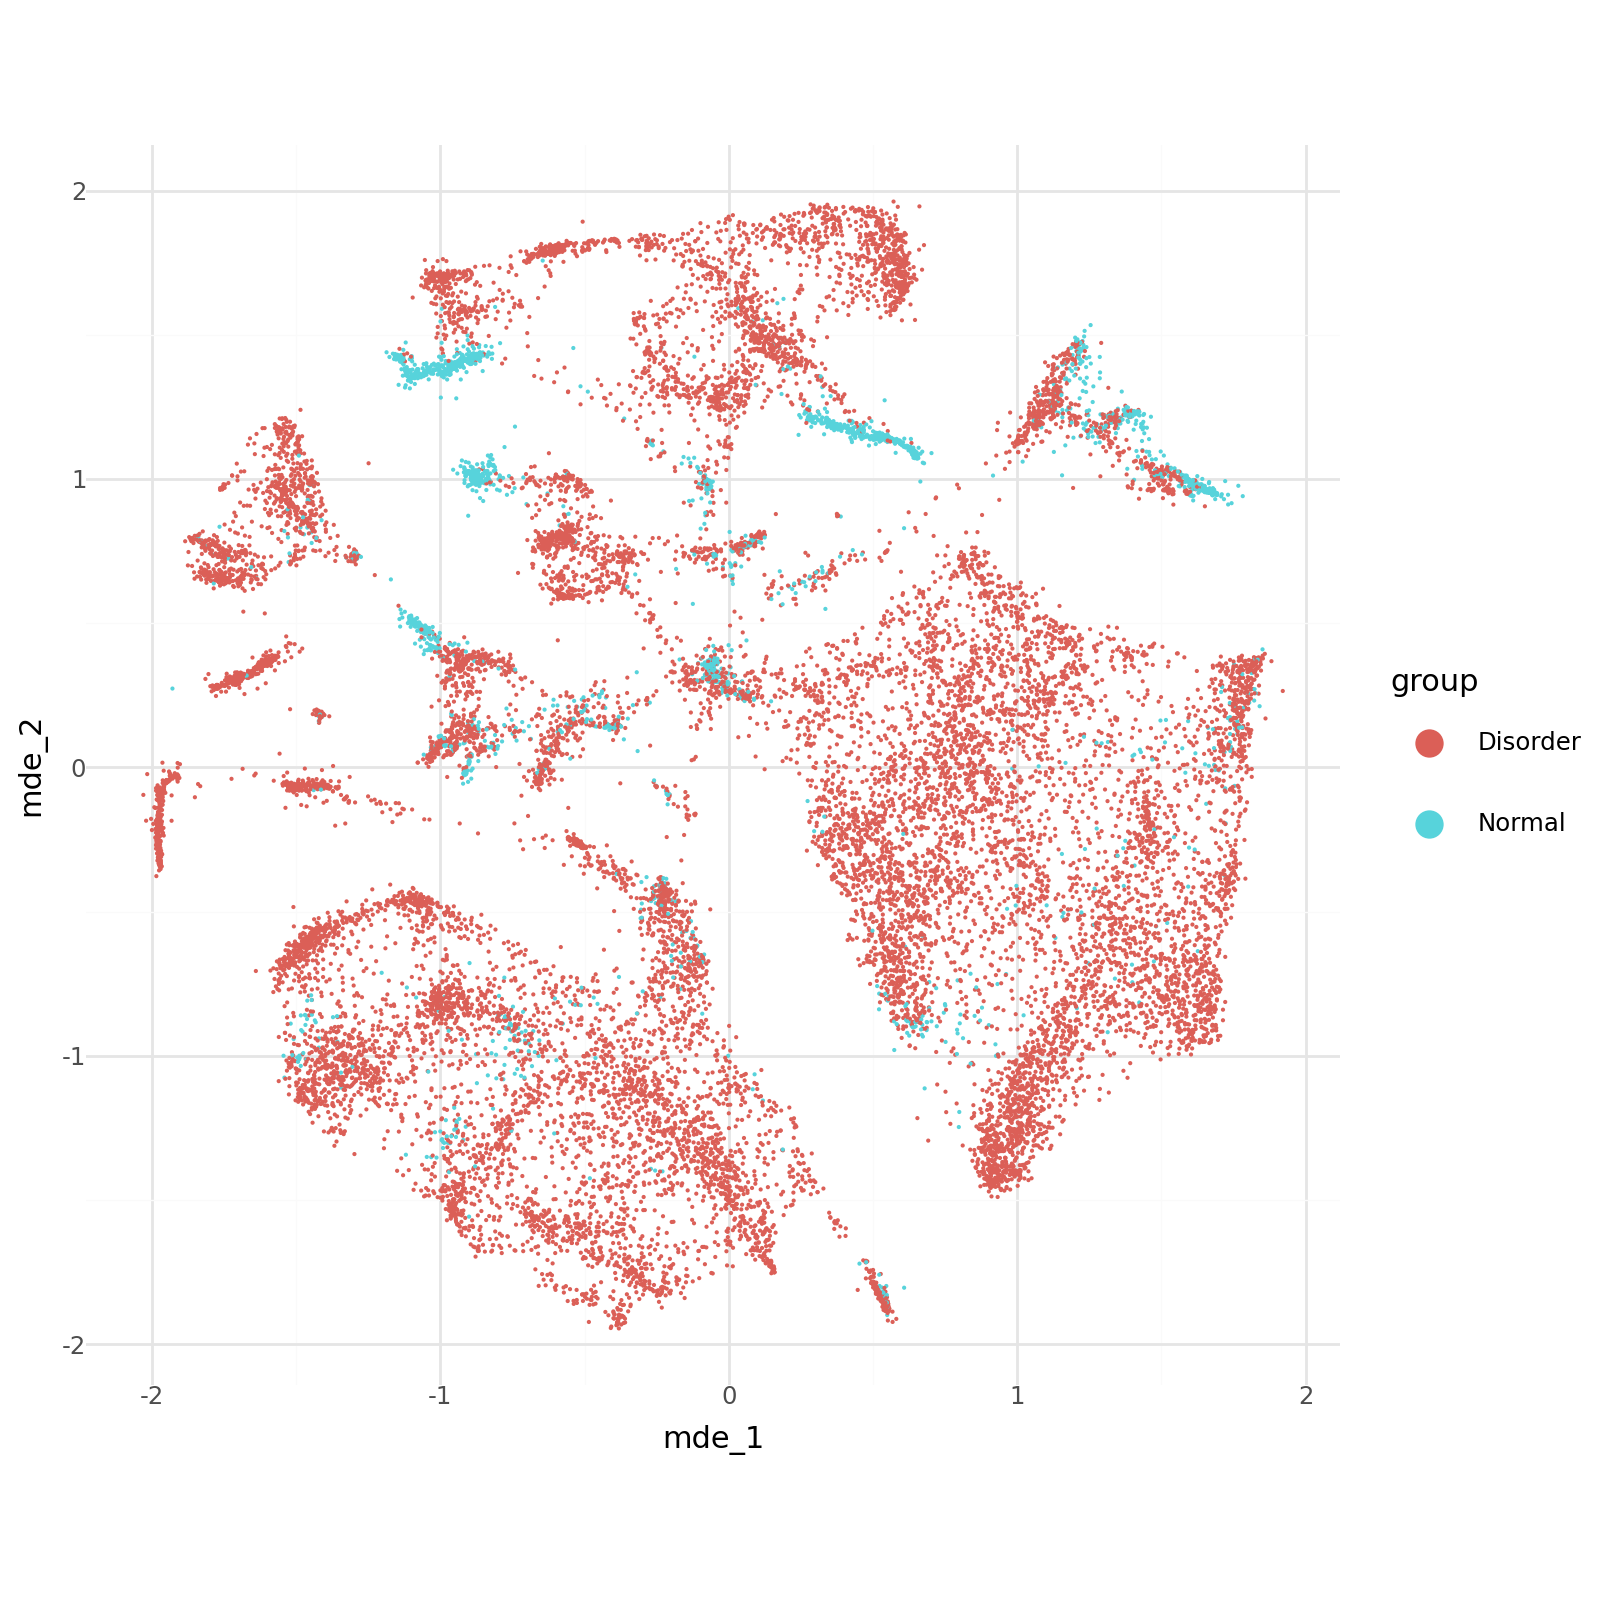

In [ ]:
p.options.figure_size = 8, 8

tmp_ = model.adata.obs.sample(20_000)
# tmp_ = model.adata.obs

p_ = (
    p.ggplot(p.aes(x="mde_1", y="mde_2", color="group"), tmp_)
    # + p.geom_point(shape = '.', size = 0.1, color = 'lightgrey', data = tmp_.drop(['participant_ids'], axis = 1))
    + p.geom_point(shape=".", size=0.2)
    + p.coord_equal()
    + p.theme_minimal()
    + p.guides(color=p.guide_legend(override_aes={"size": 10}))
    # + p.facet_grid('participant_ids ~ .', labeller = 'label_both')
)

# p_.save('fig3.png', dpi = 300)

print(p_)

- 差异分析

In [ ]:
model.adata.obs.groupby([ANNO_COL, "group"], observed=True).size()

manual_celltype_annotation  group   
B cells                     Disorder      158
                            Normal         20
Dendritic cells             Disorder     1573
                            Normal          5
Endoneurial fibroblasts     Disorder     3352
                            Normal        877
Endothelial cells           Disorder     4132
                            Normal       1651
Epineurial fibroblasts      Disorder    32278
                            Normal       1231
Macrophages                 Disorder    26426
                            Normal       1132
NK cells                    Disorder     1332
                            Normal         26
Perineurial fibroblasts     Disorder      769
                            Normal        280
Schwann cells               Disorder    11916
                            Normal       3579
Smooth muscle cells         Disorder     3362
                            Normal       2007
T cells                     Disorder     41

In [ ]:
SUB_CELL_TYPES = "B cells"

idx_ = (
    model.adata.obs.query(f"{ANNO_COL} == '{SUB_CELL_TYPES}'")
    .query('group in ["Normal", "Disorder"]')
    .index
)
tmp_ = model.adata[idx_].copy()

de_results = model.differential_expression(
    tmp_, groupby="group", group1="Disorder", group2="Normal"
)

INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


/home/fanxi/projects/work/sc-rna/sc-project-4-irea/sc_rna/rep2/.venv/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.


DE...: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


In [ ]:
import pandas as pd

sheet_dict = pd.read_excel("./data/极化分析/41586_2023_6816_MOESM5_ESM.xlsx", sheet_name=None)

In [ ]:
cytokine_responses = pd.concat(sheet_dict.values()).reset_index(drop=True)
cytokine_responses

,Celltype,Celltype_Str,Cytokine,Cytokine_Str,Gene,Avg_log2FC,FDR,Pct_Cytokine,Pct_PBS
0,B cell,B_cell,IL-1α,IL1a,Zfp36l2,1.090930,8.007951e-20,0.509,0.217
1,B cell,B_cell,IL-1α,IL1a,Arap2,0.891994,7.896447e-10,0.314,0.110
2,B cell,B_cell,IL-1α,IL1a,Socs3,0.843500,5.320295e-10,0.160,0.023
3,B cell,B_cell,IL-1α,IL1a,Napsa,0.808776,1.244916e-14,0.794,0.585
4,B cell,B_cell,IL-1α,IL1a,Gpr171,0.791013,1.743135e-09,0.331,0.124
...,...,...,...,...,...,...,...,...,...
71982,Treg,Treg,Noggin,Noggin,Dusp1,-1.393710,1.635109e-07,0.158,0.392
71983,Treg,Treg,TPO,TPO,Rgs2,-0.801164,3.999226e-02,0.117,0.235
71984,Treg,Treg,TPO,TPO,Junb,-0.817614,4.794422e-03,0.531,0.643
71985,Treg,Treg,TPO,TPO,Fos,-0.862637,1.773044e-02,0.079,0.207


In [ ]:
cytokine_responses.groupby(["Celltype_Str"]).size()

Celltype_Str
B_cell         3644
ILC             390
Langerhans     1819
Macrophage     3044
Mast_cell       564
MigDC          3736
Monocyte       3609
NK_cell        8205
Neutrophil      484
T_cell_CD4     4253
T_cell_CD8     6231
T_cell_gd      7505
Treg           3506
cDC1           8058
cDC2          13062
eTAC            108
pDC            3769
dtype: int64

In [ ]:
cytokine_responses_cell = "B_cell"

celltype_response = cytokine_responses.query(
    f"Celltype_Str == '{cytokine_responses_cell}'"
).copy()

celltype_response["Gene"] = celltype_response["Gene"].map(lambda s: [s])
response_sets = celltype_response.groupby(["Cytokine"])["Gene"].sum().to_dict()
print(response_sets)

{'4-1BBL': ['Itsn2', 'Pgam1', 'Fam208b', 'Commd2', 'Ptges2', 'Tmsb10', 'Mycbp', 'Sephs2', 'Mib2', 'Idua', 'Ccdc77', 'Ipmk', 'Sfxn3', 'Pus7l', 'Snx32'], 'AdipoQ': ['Eef1d', 'Naca', 'Ddx5', 'Vpreb3', 'Klf2', 'Zfp36', 'Fcer2a', 'Hist1h1c', 'Fos'], 'BAFF': ['Nfkbia', 'Pfn1', 'Cxcr4', 'Klf2', 'Tsc22d3'], 'C5a': ['Hsp90aa1', 'H2-T23', 'Jun', 'Fos'], 'CD40L': ['Nme1', 'Eif5a', 'Apex1', 'Eif4a1', 'Mif', 'Tagln2', 'Marcksl1', 'Ncl', 'Anp32b', 'Mettl1', 'Manf', 'Psme2', 'Il4i1', 'Cdk4', 'Ranbp1', 'Pdia6', 'Set', 'Ppp1r14b', 'Cct3', 'Atp5g1', 'Hspa5', 'Srm', 'Hdgf', 'Pa2g4', 'Park7', 'Hspd1', 'Calr', 'Psmc4', 'Ptma', 'Alkbh1', 'Ppia', 'Nop56', 'Dctpp1', 'Mrpl23', 'Mrpl12', 'C1qbp', 'Polr3h', 'Rrp1b', 'Mrpl24', 'Eif2s2', 'Hsp90ab1', 'Cyc1', 'Ran', 'Hnrnpd', 'Psmd11', 'Prmt1', 'Prmt3', 'Lsm7', 'Psmb2', 'Hsp90b1', 'Taf10', 'Rrp9', 'Cyba', 'Mars', 'Eif3b', 'Drap1', 'Gnl3', 'Tubb5', 'Txnl1', 'Lamtor4', 'G3bp1', 'Erh', 'Tkt', 'E2f4', 'Gpatch4', 'Dnajb11', 'Gspt1', 'Odc1', 'Sdf2l1', 'Zc3h15', 'Snrpa', '

In [ ]:
de_results

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Top2a,0.9518,0.0482,2.982996,7.095095e-06,1.872991e-07,0.0,0.25,-1.466043,-1.582839,3.374307,...,0.101266,0.00,0.018987,0.00,1.777387,0.000000,True,Disorder vs Normal,Disorder,Normal
Cd209f,0.9514,0.0486,2.974311,1.768472e-09,2.609819e-09,0.0,0.25,-2.272880,-2.284102,2.742221,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,True,Disorder vs Normal,Disorder,Normal
Cenpf,0.9468,0.0532,2.879029,2.061546e-06,9.491217e-08,0.0,0.25,-1.365551,-1.479077,3.196076,...,0.018987,0.00,0.018987,0.00,0.491478,0.000000,False,Disorder vs Normal,Disorder,Normal
Cdca3,0.9424,0.0576,2.794907,2.342999e-06,1.733457e-07,0.0,0.25,-1.433220,-1.574493,2.917166,...,0.012658,0.00,0.006329,0.00,0.189494,0.000000,False,Disorder vs Normal,Disorder,Normal
Fam64a,0.9420,0.0580,2.787562,2.170549e-07,4.472950e-08,0.0,0.25,-1.170373,-1.334557,2.906310,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,False,Disorder vs Normal,Disorder,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lcp1,0.3722,0.6278,-0.522790,3.823720e-04,3.820799e-04,0.0,0.25,-0.008227,-0.012806,0.287293,...,0.974684,0.10,0.518987,0.10,22.263324,5.551388,False,Disorder vs Normal,Disorder,Normal
Gmfg,0.3326,0.6674,-0.696449,6.578030e-04,6.371196e-04,0.0,0.25,0.036325,0.057990,0.269452,...,2.329114,0.95,0.803797,0.55,60.919030,55.606369,False,Disorder vs Normal,Disorder,Normal
Arhgdib,0.3210,0.6790,-0.749180,7.929914e-04,7.541722e-04,0.0,0.25,0.058055,0.061416,0.271784,...,3.721519,1.00,0.879747,0.60,88.918978,63.958191,False,Disorder vs Normal,Disorder,Normal
Tmsb4x,0.3022,0.6978,-0.836843,2.040092e-02,2.042523e-02,0.0,0.25,-0.005009,-0.002181,0.249958,...,66.803797,21.05,1.000000,1.00,1584.848438,1276.009922,False,Disorder vs Normal,Disorder,Normal


In [ ]:
from scipy import stats  # 导入scipy库中的stats模块，用于统计计算

# 筛选出proba_de大于0.95的差异表达基因，并按lfc_median降序排序
fde_r = de_results.query("proba_de > 0.95").sort_values("lfc_median", ascending=False)

de_genes = set(fde_r.index)  # 获取筛选出的差异表达基因的索引，转换为集合
universe = set(model.adata.var.index)  # 获取所有基因的索引，转换为集合

# 创建一个数据框，初始值全为1，行索引为response_sets的键，列为指定的五个列
results = pd.DataFrame(
    1,
    index=list(response_sets.keys()),
    columns=["intersection", "response_gene_set", "de_genes", "universe", "pvals"],
)
results["de_genes"] = len(de_genes)  # 将差异表达基因的数量赋值给de_genes列
results["universe"] = len(universe)  # 将所有基因的数量赋值给universe列

# 遍历results数据框的每一行
for ind in results.index:
    response_gene_set = set(response_sets[ind])  # 获取当前行对应的响应基因集合
    common = response_gene_set.intersection(
        de_genes
    )  # 计算响应基因集合与差异表达基因集合的交集
    results.loc[ind, "intersection"] = len(
        common
    )  # 将交集的基因数量赋值给intersection列
    results.loc[ind, "response_gene_set"] = len(
        response_gene_set
    )  # 将响应基因集合的数量赋值给response_gene_set列
    # 计算超几何分布的p值，参数为交集基因数量减1、所有基因数量、差异表达基因数量、响应基因集合数量
    pval = stats.hypergeom.sf(
        len(common) - 1, len(universe), len(de_genes), len(response_gene_set)
    )
    results.loc[ind, "pvals"] = pval  # 将计算得到的p值赋值给pvals列

results["Cytokine"] = results.index  # 将results的索引赋值给新列Cytokine

In [ ]:
results.sort_values("pvals", ascending=True).head(20)

,intersection,response_gene_set,de_genes,universe,pvals,Cytokine
4-1BBL,0,15,2,2000,1,4-1BBL
IL-1β,0,15,2,2000,1,IL-1β
IL-2,0,16,2,2000,1,IL-2
IL-21,0,191,2,2000,1,IL-21
IL-22,0,1,2,2000,1,IL-22
IL-23,0,41,2,2000,1,IL-23
IL-24,0,2,2,2000,1,IL-24
IL-27,0,11,2,2000,1,IL-27
IL-3,0,2,2,2000,1,IL-3
IL-33,0,28,2,2000,1,IL-33


In [ ]:
adjust_text_dict = {
    "expand_points": (2, 2),
    "arrowprops": {"arrowstyle": "->", "color": "k"},
}

In [ ]:
p.options.figure_size = 8, 4
adjust_thr = 0.1

p_ = (
    p.ggplot(p.aes(x="(intersection / response_gene_set)", y="pvals"), results)
    + p.geom_point(shape=".", size=1.0)
    + p.geom_label(
        p.aes(label="Cytokine"),
        adjust_text=adjust_text_dict,
        data=results.query("pvals < @adjust_thr"),
    )
    + p.geom_label(p.aes(label="Cytokine"), data=results.query("pvals >= @adjust_thr"))
    + p.scale_x_log10()
    + p.scale_y_continuous(trans=neg_log10, breaks=neg_log10_breaks())
    + p.theme_minimal()
    + p.guides(color=p.guide_legend(override_aes={"size": 10}))
    + p.labs(
        title="Immune response enrichment analysis",
        subtitle="Macrophage - AcuteColitis vs Healthy",
        x="Fraction response genes being DE",
        y="Hypergeometric P-value",
    )
)

# p_.save("fig1.png", dpi=300)

print(p_)

/tmp/ipykernel_1705967/2082796282.py:27: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/home/fanxi/projects/work/sc-rna/sc-project-4-irea/sc_rna/rep2/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


IndexError: index 0 is out of bounds for axis 0 with size 0